1.	Для следующих двух последовательностей постройте простой точечный график. Поместите последовательности вдоль осей и поставьте точку для каждой идентичной пары.
GCTAGTCAGATCTGACGCTA
GATGGTCACATCTGCCGC
Имеется ли на графике область схожести? Опишите.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
seq1 = 'GCTAGTCAGATCTGACGCTA'
seq2 = 'GATGGTCACATCTGCCGC'

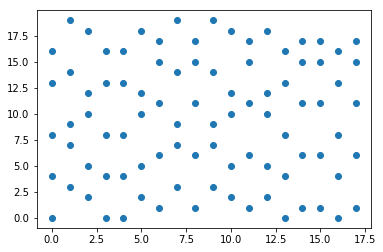

In [66]:
c_i = 0
equal_x = []
equal_y = []
for i in seq2:
    c_j = 0
    for j in seq1:
        if i == j:
            equal_x.append(c_i)
            equal_y.append(c_j)
        c_j += 1
    c_i += 1
yp = None

fig, ax = plt.subplots()
ax.plot(equal_x, equal_y, 'o')
plt.show()

Как видно из графика последовательности достаточно схожи

2.	Проанализируйте два выравнивания ниже
Alignment 1
Seq1       AGTGTGAAGGTCCCGGCTAAT---CG
           : :: :  : :   ::: :::   ::
Seq2       A-TGCG--GCTAATGGC-AATATACG
 Alignment 2
Seq1       AGTGTGAAGGTCCCGGCTAAT---------CG
           :   ::       ::::::::         ::
Seq2       A---TG-------CGGCTAATGGCAATATACG
Эти выравнивания были выполнены с использованием того же штрафа за открытие гэпа, но с различными штрафами за продолжение гэпа. Что можно сказать о значениях штрафов за продолжение гэпа для каждого их выравниваний?


Очевидно, что во второй последовательности штраф за продление гэпа(делеции) уменьшается за каждую делецию идущую вподряд.
Поэтому во второй последовательности мы наблюдаем больште по сравнению с первой последовательностью гэпы.
Уменьшение штрафа логично обуславливает то, что при делеция подразумевает вырезание какого-то куска и важнейшим является факт его наличие, а не размера

3. Заполните следующие таблицы динамического программирования с использованием параметров: (совпадение(match) +1, несовпадение (mismatch) -1, инделы -1). Запишите оптимальное выравнивание и рассчитанное значение коэффициента сходства двух последовательностей. Покажите в таблице путь соответствующий оптимальному выравниванию.
AACGTTAC
CGATAAC 	 	 	 	 	 	 	 

In [61]:
def init_matrix(x, y):
    f = np.zeros((len(x) + 1, len(y) + 1), int)
    for i in range(len(x) + 1):
        f[i][0] = -i
    for i in range(len(y) + 1):
        f[0][i] = -i
    return f

def g(x, y):
    if x != y:
        return -1
    else:
        return 1

def global_alignment(x, y):
    f = init_matrix(x, y)
    for i in range(1, len(x) + 1, 1):
        for j in range(1, len(y) + 1, 1):
            match = f[i - 1][j - 1] + g(x[i - 1], y[j - 1])
            delete = f[i - 1][j] - 1
            insert = f[i][j - 1] - 1
            f[i][j] = max(match, insert, delete)
    return f

def local_alignment(x, y):
    f = init_matrix(x, y)
    for i in range(1, len(x) + 1, 1):
        for j in range(1, len(y) + 1, 1):
            match = f[i - 1][j - 1] + g(x[i - 1], y[j - 1])
            delete = f[i - 1][j] - 1
            insert = f[i][j - 1] - 1
            f[i][j] = max(match, insert, delete, 0)
    return f

In [62]:
dna1 = 'AACGTTAC'
dna2 = 'CGATAAC'

In [63]:
ga = global_alignment(dna1, dna2)
print('global')
print(ga)

global
[[ 0 -1 -2 -3 -4 -5 -6 -7]
 [-1 -1 -2 -1 -2 -3 -4 -5]
 [-2 -2 -2 -1 -2 -1 -2 -3]
 [-3 -1 -2 -2 -2 -2 -2 -1]
 [-4 -2  0 -1 -2 -3 -3 -2]
 [-5 -3 -1 -1  0 -1 -2 -3]
 [-6 -4 -2 -2  0 -1 -2 -3]
 [-7 -5 -3 -1 -1  1  0 -1]
 [-8 -6 -4 -2 -2  0  0  1]]


In [64]:
la = global_alignment(dna1, dna2)
print('local')
print(la)

local
[[ 0 -1 -2 -3 -4 -5 -6 -7]
 [-1 -1 -2 -1 -2 -3 -4 -5]
 [-2 -2 -2 -1 -2 -1 -2 -3]
 [-3 -1 -2 -2 -2 -2 -2 -1]
 [-4 -2  0 -1 -2 -3 -3 -2]
 [-5 -3 -1 -1  0 -1 -2 -3]
 [-6 -4 -2 -2  0 -1 -2 -3]
 [-7 -5 -3 -1 -1  1  0 -1]
 [-8 -6 -4 -2 -2  0  0  1]]


4. В таблице приведено два выравнивания аминокислотных последовательностей KNAAWPG и KQWAALSPG.
Рассчитайте коэффициенты выравнивания для первого и второго выравнивания используя две матрицы замен BLOSUM-50 и ID-6,3. В обоих случаях гэпы штрафуются, используя аффинные штрафы (открытие гэпа: -8, продолжение гэпа -1).

alg1 BLOSUM-50 15

alg1 ID-6,3 -2

alg2 BLOSUM-50 12

alg2 ID-6,3 4